In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Cleaning df_final_demo

In [97]:
path3 = "https://raw.githubusercontent.com/gabriela-cl/vanguard-ab-test/main/data/raw/df_final_demo.csv"
df_final_demo = pd.read_csv(path3, sep=';')
pd.set_option('display.max_columns', None)
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [98]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [99]:
df_final_demo.isnull().any()

client_id           False
clnt_tenure_yr       True
clnt_tenure_mnth     True
clnt_age             True
gendr                True
num_accts            True
bal                  True
calls_6_mnth         True
logons_6_mnth        True
dtype: bool

In [100]:
df_final_demo["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [101]:
df_final_demo.duplicated().sum()

0

In [102]:
df_final_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [103]:
df_final_demo.columns[df_final_demo.isnull().mean() > 0.8]

Index([], dtype='object')

### Demographics

In [104]:
df_final_demo["clnt_tenure_yr"].describe().round(2)

count    70595.00
mean        12.05
std          6.87
min          2.00
25%          6.00
50%         11.00
75%         16.00
max         62.00
Name: clnt_tenure_yr, dtype: float64

In [105]:
df_final_demo["clnt_age"].describe().round(2)

count    70594.00
mean        46.44
std         15.59
min         13.50
25%         32.50
50%         47.00
75%         59.00
max         96.00
Name: clnt_age, dtype: float64

In [110]:
bins = [10, 20, 40, 60, 80, 100]
labels = ['10 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100']
df_final_demo['Clients Age'] = pd.cut(df_final_demo["clnt_age"], bins=bins, labels = labels, include_lowest=True)

<Axes: xlabel='Clients Age'>

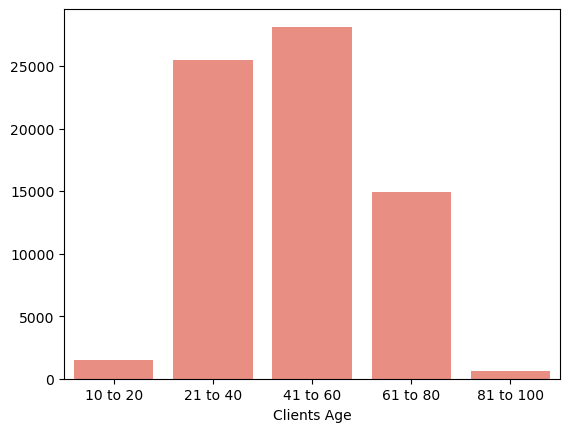

In [111]:
sns.barplot(x =df_final_demo['Clients Age'].value_counts().index, y = df_final_demo['age_bin'].value_counts().values, color="salmon")

In [114]:
df_final_demo["gendr"].describe()

count     70595
unique        4
top           U
freq      24122
Name: gendr, dtype: object

In [119]:
df_final_demo["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [120]:
# Filter the DataFrame for 'M' and 'F' genders only
filtered_df = df_final_demo[df_final_demo['gendr'].isin(['M', 'F'])]

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_5551/606614102.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gendr', data=filtered_df, palette=['lightblue', 'salmon'])


([<matplotlib.axis.XTick at 0x32640e390>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

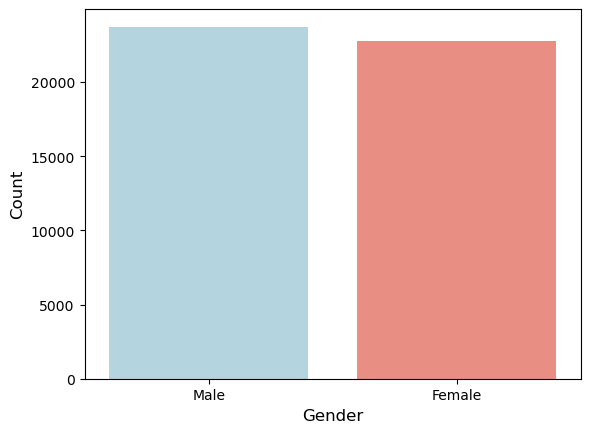

In [125]:
sns.countplot(x='gendr', data=filtered_df, palette=['lightblue', 'salmon'])

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

## Data Web

In [71]:
path_1= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_1.csv"
df_web_1 = pd.read_csv(path_1,sep=';')
path_2= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_2.csv"
df_web_2 = pd.read_csv(path_2,sep=';')

path_3 = "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_demo.csv"

df_final_demo = pd.read_csv(path_3, sep=';')

path_4 ='https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
final_experiment = pd.read_csv(path_4, sep=',')
pd.set_option('display.max_columns', None)

In [64]:
#Merging the Web dataframe in we_df.
web_df =pd.concat([df_web_1, df_web_2], axis=0, join="inner")

In [65]:
web_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [85]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [87]:
web_df['date_time'] = pd.to_datetime(web_df['date_time'])

In [88]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ MB


In [66]:
merged_log_visit = pd.merge(df_final_demo[['client_id', 'clnt_tenure_mnth', 'clnt_age', 'logons_6_mnth']], 
                     web_df[['client_id', 'visit_id']], 
                     on='client_id', 
                     how='inner')

In [67]:
merged_log_visit

,client_id,clnt_tenure_mnth,clnt_age,logons_6_mnth,visit_id
0,836976,73.0,60.5,9.0,228976764_46825473280_96584
1,836976,73.0,60.5,9.0,228976764_46825473280_96584
2,836976,73.0,60.5,9.0,228976764_46825473280_96584
3,836976,73.0,60.5,9.0,228976764_46825473280_96584
4,836976,73.0,60.5,9.0,228976764_46825473280_96584
...,...,...,...,...,...
449826,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449827,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449828,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449829,5602139,254.0,59.5,7.0,884309593_49820690623_654151


In [68]:
merged_log_visit.isnull().sum().sort_values(ascending=False)

clnt_age            127
clnt_tenure_mnth    115
logons_6_mnth       115
client_id             0
visit_id              0
dtype: int64

In [126]:
merged_log_visit.duplicated().sum()

352595

In [127]:
log_no_duplicates = merged_log_visit.drop_duplicates()

In [128]:
log_no_duplicates

,client_id,clnt_tenure_mnth,clnt_age,logons_6_mnth,visit_id
0,836976,73.0,60.5,9.0,228976764_46825473280_96584
7,836976,73.0,60.5,9.0,104438405_2368283624_817211
11,2304905,94.0,58.0,9.0,724930510_65323235593_692754
17,1439522,64.0,32.0,9.0,898099666_87299892721_263146
21,1439522,64.0,32.0,9.0,968288276_7230824336_666089
...,...,...,...,...,...
449820,1573142,255.0,68.0,4.0,709721715_35968917131_979675
449821,1573142,255.0,68.0,4.0,326174177_47892407008_51741
449823,1573142,255.0,68.0,4.0,448875043_84914821939_263970
449826,5602139,254.0,59.5,7.0,158544612_4105226940_43043


## Final Experiment

In [73]:
final_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [74]:
final_experiment.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

In [76]:
final_experiment_nan = final_experiment.dropna()

In [77]:
final_experiment_nan

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [78]:
merged_exp_demo = pd.merge(df_final_demo, final_experiment_nan, on='client_id', how='inner')

In [79]:
merged_exp_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [80]:
merged_exp_demo.duplicated().sum()

0